# Calculating for each sample


train size: 898 
test size: 899


/home/heyuser/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy on testing set (MLPclassifier): 0.9733


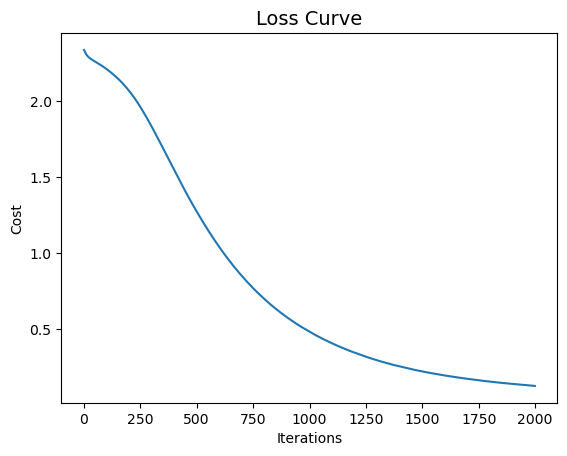

Final loss curve value:  0.12656290014396887


In [5]:
import matplotlib.pyplot as plt
from sklearn import metrics, datasets, tree
from sklearn.model_selection import train_test_split

# Custom data
gn = 9

# 1. load 
dt = datasets.load_digits() 
X, y = dt.data, dt.target

#from sklearn.datasets import fetch_openml
#mnist = fetch_openml('mnist_784')

# partition data with train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5,stratify=y,random_state=gn)


print("train size:",len(X_train),"\ntest size:",len(X_test))



# 2.1 learn classifier
# from sklearn.linear_model import LogisticRegression

# predictor = LogisticRegression(max_iter=2000) 
# predictor.fit(X_train, y_train)

# y_pred = predictor.predict(X_test)
# print("accuracy on testing set (LogR):",  round(metrics.accuracy_score(y_test, y_pred),2))



# 2.2 learn classifier
from sklearn.neural_network import MLPClassifier

predictor = MLPClassifier(hidden_layer_sizes=(64, 32),random_state=9,activation ='logistic',solver='sgd',max_iter=2000)
#predictor = MLPClassifier(random_state=42)
predictor.fit(X_train, y_train)

y_pred = predictor.predict(X_test)
print("accuracy on testing set (MLPclassifier):",  round(metrics.accuracy_score(y_test, y_pred),4))


# 3. Plot the loss curve
plt.plot(predictor.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# 
print("Final loss curve value: ", predictor.loss_curve_[-1])

## Software a) - calculating best number of layers

In [ ]:
# Code with optuna


import matplotlib.pyplot as plt
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import optuna

# Custom data
gn = 9

# 1. Load data (digits dataset)
dt = datasets.load_digits() 
X, y = dt.data, dt.target

# Partition data with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, stratify=y, random_state=gn)
print("Train size:", len(X_train), "\nTest size:", len(X_test))

# Define the objective function for Bayesian Optimization
def objective(trial):
    # Sample the number of hidden layers and their sizes
    n_layers = trial.suggest_int('n_layers', 1, 5)  # Number of hidden layers between 1 and 5
    layer_sizes = []
    
    for i in range(n_layers):
        layer_size = trial.suggest_int(f'n_units_layer_{i}', 16, 128)  # Size of each hidden layer between 16 and 128
        layer_sizes.append(layer_size)
    
    # Define the MLPClassifier with the sampled hidden layer sizes
    predictor = MLPClassifier(hidden_layer_sizes=tuple(layer_sizes), 
                              random_state=9, 
                              activation='logistic', 
                              solver='sgd', 
                              max_iter=2000)

    # Fit the classifier
    predictor.fit(X_train, y_train)
    
    # Predict on the test set and calculate accuracy
    y_pred = predictor.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    return accuracy

# Set up Bayesian Optimization using Optuna
study = optuna.create_study(direction='maximize')  # We want to maximize the accuracy
study.optimize(objective, n_trials=30)  # Perform 30 trials

# Output the best parameters and the best score
print(f"Best parameters: {study.best_params}")
print(f"Best accuracy from optimization: {study.best_value:.4f}")

# Train the best model with the optimized parameters
best_params = study.best_params
best_layer_sizes = [best_params[f'n_units_layer_{i}'] for i in range(best_params['n_layers'])]

best_model = MLPClassifier(hidden_layer_sizes=tuple(best_layer_sizes),
                           random_state=9,
                           activation='logistic',
                           solver='sgd',
                           max_iter=2000)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# 2.2 Print the final accuracy
print("Accuracy on testing set (Optimized MLPClassifier):", round(metrics.accuracy_score(y_test, y_pred), 4))

# 3. Plot the loss curve
plt.plot(best_model.loss_curve_)
plt.title("Loss Curve (Optimized Model)", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Print the final loss curve value
print("Final loss curve value (Optimized Model):", best_model.loss_curve_[-1])

/home/heyuser/miniconda3/envs/myenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-10-10 15:20:45,719] A new study created in memory with name: no-name-20184c6f-11f3-4008-914b-6fd22c7471fe


Train size: 898 
Test size: 899


[I 2024-10-10 15:20:46,619] Trial 0 finished with value: 0.10122358175750834 and parameters: {'n_layers': 4, 'n_units_layer_0': 50, 'n_units_layer_1': 97, 'n_units_layer_2': 23, 'n_units_layer_3': 128}. Best is trial 0 with value: 0.10122358175750834.
/home/heyuser/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
[I 2024-10-10 15:21:13,952] Trial 1 finished with value: 0.9688542825361512 and parameters: {'n_layers': 2, 'n_units_layer_0': 102, 'n_units_layer_1': 118}. Best is trial 1 with value: 0.9688542825361512.
[I 2024-10-10 15:21:15,066] Trial 2 finished with value: 0.10122358175750834 and parameters: {'n_layers': 3, 'n_units_layer_0': 44, 'n_units_layer_1': 52, 'n_units_layer_2': 17}. Best is trial 1 with value: 0.9688542825361512.
[I 2024-10-10 15:21:16,219] Trial 3 finished with value: 0.10233592880978866 and parameters: {'n_layers': 

## Software b) - calculating for the best 